In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

2024-02-11 15:12:36.112083: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get data files
# !wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
# !wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [3]:
column_names = ["label", "message"]
df_train = pd.read_csv(train_file_path, names=column_names, sep="\t")
df_train

,label,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [4]:
def transform_label(label):
    if label == 'ham':
        return 1
    else:
        return 0

# Apply the transform_label function to the 'label' column
df_train['label'] = df_train['label'].apply(transform_label)
df_train

,label,message
0,1,ahhhh...just woken up!had a bad dream about u ...
1,1,you can never do nothing
2,1,"now u sound like manky scouse boy steve,like! ..."
3,1,mum say we wan to go then go... then she can s...
4,1,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,1,just woke up. yeesh its late. but i didn't fal...
4175,1,what do u reckon as need 2 arrange transport i...
4176,0,free entry into our £250 weekly competition ju...
4177,0,-pls stop bootydelious (32/f) is inviting you ...


In [5]:
column_names = ["label", "message"]
df_test = pd.read_csv(test_file_path, names=column_names, sep="\t")
df_test

,label,message
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?
...,...,...
1387,ham,true dear..i sat to pray evening and felt so.s...
1388,ham,"what will we do in the shower, baby?"
1389,ham,where are you ? what are you doing ? are yuou ...
1390,spam,ur cash-balance is currently 500 pounds - to m...


In [6]:
# Apply the transform_label function to the 'label' column
df_test['label'] = df_test['label'].apply(transform_label)
df_test

,label,message
0,1,i am in hospital da. . i will return home in e...
1,1,"not much, just some textin'. how bout you?"
2,1,i probably won't eat at all today. i think i'm...
3,1,don‘t give a flying monkeys wot they think and...
4,1,who are you seeing?
...,...,...
1387,1,true dear..i sat to pray evening and felt so.s...
1388,1,"what will we do in the shower, baby?"
1389,1,where are you ? what are you doing ? are yuou ...
1390,0,ur cash-balance is currently 500 pounds - to m...


In [7]:
df_train.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
df_train.shape

(4179, 2)

In [9]:
print(f"Spam SMS: {round(df_train['label'].value_counts()[0] / len(df_train) * 100, 2)} %") 
print(f"Not Spam SMS: {round(df_train['label'].value_counts()[1] / len(df_train) * 100 , 2)} %")

df_train['label'].value_counts()

Spam SMS: 13.4 %
Not Spam SMS: 86.6 %


label
1    3619
0     560
Name: count, dtype: int64

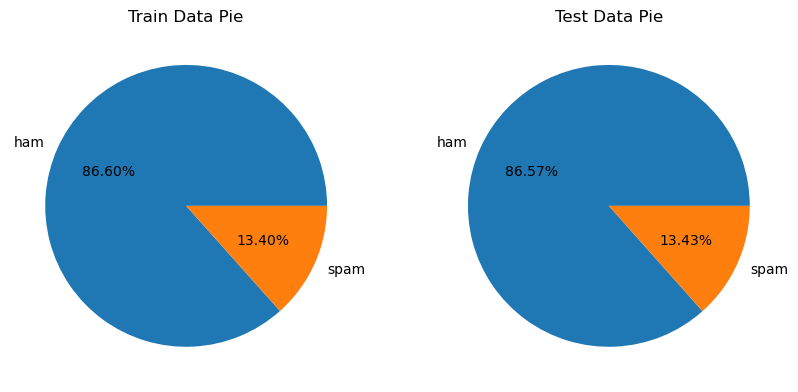

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(df_train['label'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%")
axes[0].set_title('Train Data Pie')
axes[1].pie(df_test['label'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%")
axes[1].set_title('Test Data Pie')

plt.show()

In [11]:
import re
from nltk.corpus import stopwords


def textProcessing(text):
    text = re.sub(r'[^\w\s]', '', text)
    splitted_text = text.split(" ")
    splitted_text = list(filter(lambda string: string, splitted_text))
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [word for word in splitted_text if word not in stop_words]
    text = " ".join(filtered_sentence)
    return text

In [12]:
df_train['clnm'] = df_train['message'].apply(textProcessing)
df_train

,label,message,clnm
0,1,ahhhh...just woken up!had a bad dream about u ...,ahhhhjust woken uphad bad dream u thoso dont l...
1,1,you can never do nothing,never nothing
2,1,"now u sound like manky scouse boy steve,like! ...",u sound like manky scouse boy stevelike travel...
3,1,mum say we wan to go then go... then she can s...,mum say wan go go shun bian watch da glass exh...
4,1,never y lei... i v lazy... got wat? dat day ü ...,never lei v lazy got wat dat day ü send da url...
...,...,...,...
4174,1,just woke up. yeesh its late. but i didn't fal...,woke yeesh late didnt fall asleep til ltgt
4175,1,what do u reckon as need 2 arrange transport i...,u reckon need 2 arrange transport u cant thanks
4176,0,free entry into our £250 weekly competition ju...,free entry 250 weekly competition text word wi...
4177,0,-pls stop bootydelious (32/f) is inviting you ...,pls stop bootydelious 32f inviting friend repl...


In [13]:
spam_wrds = df_train[df_train['label'] == 0]['clnm'].apply(lambda x: x.split(" ")).tolist()
flatten_spam_wrds = [element for sublist in spam_wrds for element in sublist]
print(len(flatten_spam_wrds))

ham_wrds = df_train[df_train['label'] == 1]['clnm'].apply(lambda x: x.split(" ")).tolist()
flatten_ham_wrds = [element for sublist in ham_wrds for element in sublist]
print(len(flatten_ham_wrds))

9370
30204


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'ur'),
  Text(5, 0, 'u'),
  Text(6, 0, 'mobile'),
  Text(7, 0, '4'),
  Text(8, 0, 'text'),
  Text(9, 0, 'stop'),
  Text(10, 0, 'reply'),
  Text(11, 0, 'claim'),
  Text(12, 0, 'get'),
  Text(13, 0, 'prize'),
  Text(14, 0, 'new'),
  Text(15, 0, 'nokia'),
  Text(16, 0, 'send'),
  Text(17, 0, 'cash'),
  Text(18, 0, 'win'),
  Text(19, 0, 'service')])

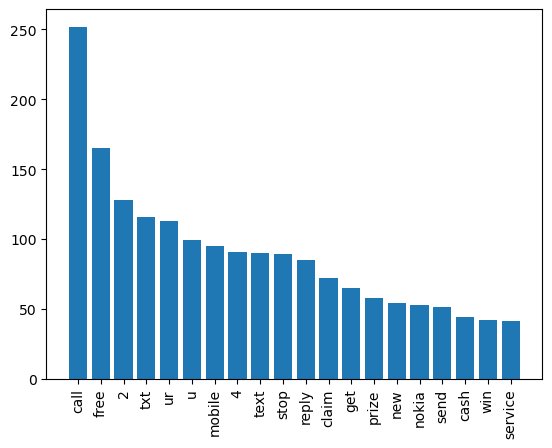

In [14]:
import collections


spam_wrds_counts = collections.Counter(flatten_spam_wrds)
plt.bar(pd.DataFrame(spam_wrds_counts.most_common(20))[0], pd.DataFrame(spam_wrds_counts.most_common(20))[1])
plt.xticks(rotation = 'vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'u'),
  Text(1, 0, 'im'),
  Text(2, 0, 'get'),
  Text(3, 0, '2'),
  Text(4, 0, 'ok'),
  Text(5, 0, 'ltgt'),
  Text(6, 0, 'dont'),
  Text(7, 0, 'go'),
  Text(8, 0, 'like'),
  Text(9, 0, 'call'),
  Text(10, 0, 'know'),
  Text(11, 0, 'ill'),
  Text(12, 0, 'come'),
  Text(13, 0, 'got'),
  Text(14, 0, 'ur'),
  Text(15, 0, 'good'),
  Text(16, 0, 'time'),
  Text(17, 0, 'day'),
  Text(18, 0, 'love'),
  Text(19, 0, 'ü')])

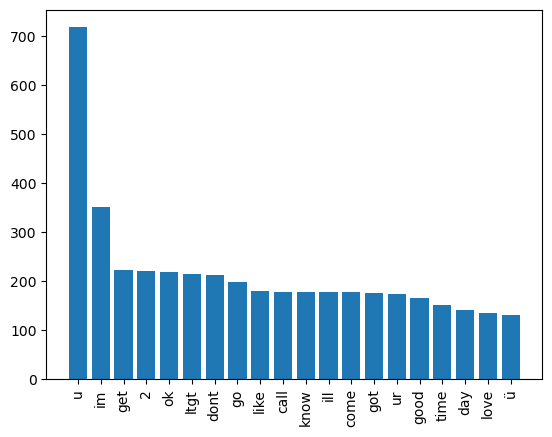

In [15]:
ham_wrds_counts = collections.Counter(flatten_ham_wrds)
plt.bar(pd.DataFrame(ham_wrds_counts.most_common(20))[0], pd.DataFrame(ham_wrds_counts.most_common(20))[1])
plt.xticks(rotation = 'vertical')

In [16]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer 


cv = CountVectorizer
# Initialize the TF-IDF vectorizer 
tf = TfidfVectorizer(max_features = 3000) 
# Fit and transform the text column 
X = tf.fit_transform(df_train['clnm']).toarray()
X.shape

(4179, 3000)

In [17]:
y = df_train['label']
y

0       1
1       1
2       1
3       1
4       1
       ..
4174    1
4175    1
4176    0
4177    0
4178    1
Name: label, Length: 4179, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [21]:
from sklearn.naive_bayes import *
from sklearn.svm import SVC
from sklearn.metrics import *

#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
bnb = BernoulliNB()
# lr = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=100,random_state=11)
# abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [22]:
gnb.fit(X_train, y_train) 

y_pred1 = gnb.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}") 
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.8755980861244019
[[119  15]
 [ 89 613]]
Precision Score 0.9761146496815286


In [23]:
mnb.fit(X_train, y_train) 

y_pred2 = mnb.predict(X_test) 

print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")

Accuracy Score: 0.9784688995215312
[[118  16]
 [  2 700]]
Precision Score 0.9776536312849162


In [24]:
bnb.fit(X_train, y_train)

y_pred3 = bnb.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9760765550239234
[[117  17]
 [  3 699]]
Precision Score 0.9762569832402235


In [25]:
mnb.fit(X_train, y_train) 

y_pred4 = mnb.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred4)}") 
print(confusion_matrix(y_test, y_pred4))
print(f"Precision Score {precision_score(y_test, y_pred4)}")

Accuracy Score: 0.9784688995215312
[[118  16]
 [  2 700]]
Precision Score 0.9776536312849162


In [26]:
svc.fit(X_train, y_train) 

y_pred5 = svc.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred5)}") 
print(confusion_matrix(y_test, y_pred5))
print(f"Precision Score {precision_score(y_test, y_pred5)}")

Accuracy Score: 0.9796650717703349
[[120  14]
 [  3 699]]
Precision Score 0.9803646563814866


In [27]:
import pickle 


pickle.dump(tf, open('vectorizer.pkl', 'wb')) 
pickle.dump(svc, open('model.pkl', 'wb'))

In [38]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):

    tf_idf = pickle.load(open("vectorizer.pkl", 'rb'))
    model = pickle.load(open("model.pkl", 'rb'))
    
    transformed_sms = textProcessing(pred_text) 
    vect_input = tf_idf.transform([transformed_sms]).toarray()
    result = model.predict(vect_input)[0]
    if result > 0.5:
        return [result, 'ham']
    else:
        return [result, 'spam']

pred_text = "how are you doing today"

prediction = predict_message(pred_text)
print(prediction)

[1, 'ham']


In [39]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()

You passed the challenge. Great job!
